<a href="https://colab.research.google.com/github/ullasbc02/obesity-risk-analytics/blob/main/2_eda_spatial_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

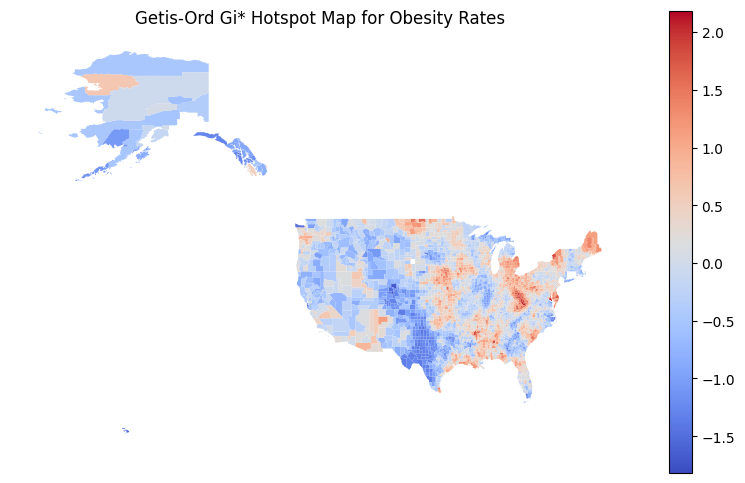

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf.plot(column="GiZScore", cmap="coolwarm", legend=True, ax=ax)
plt.title("Getis-Ord Gi* Hotspot Map for Obesity Rates")
plt.axis("off")
plt.show()


In [ ]:
import numpy as np

def classify_hotspot(z, p):
    try:
        if np.isnan(z) or np.isnan(p):
            return "Not Significant"
        elif p <= 0.05 and z > 0:
            return "Hotspot"
        elif p <= 0.05 and z < 0:
            return "Coldspot"
        else:
            return "Not Significant"
    except:
        return "Not Significant"

gdf["HotspotClass"] = np.vectorize(classify_hotspot)(gdf["GiZScore"], gdf["GiPValue"])


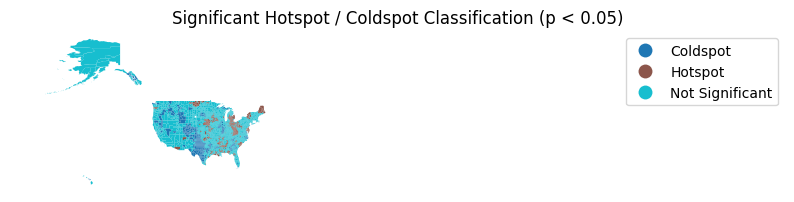

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
gdf.plot(
    column="HotspotClass",
    categorical=True,
    legend=True,
    cmap="tab10",
    ax=ax
)
plt.title("Significant Hotspot / Coldspot Classification (p < 0.05)")
plt.axis("off")
plt.show()


In [ ]:
print(gdf["HotspotClass"].value_counts(dropna=False))


HotspotClass
Not Significant    2240
Hotspot             442
Coldspot            428
Name: count, dtype: int64


Spatial Autocorrelation & Hotspot Analysis
Global Moran’s I = 0.34 (p < 0.001) indicates a statistically significant positive spatial autocorrelation in county-level obesity rates across the U.S.
This means obesity is geographically clustered rather than randomly distributed.
The Local Getis-Ord Gi* analysis further identified distinct hotspots (high-obesity clusters) primarily in the Southeastern and Appalachian regions, and coldspots (low-obesity clusters) in the Midwest and Western U.S.
These results confirm strong regional concentration of obesity risk and support geographically targeted health-intervention strategies.

# Updated Dataset

In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
DATASET = '/content/drive/MyDrive/obesity-risk-analytics/data/processed'

In [ ]:
df_final = pd.read_csv(os.path.join(DATASET, 'df_final.csv'))

In [ ]:
df_final.head()

obesity_rate  poverty_rate  physical_inactivity_rate  low_access_food_rate  \
0      0.222000         0.090                  0.189000              0.486825   
1      0.293000         0.108                  0.209000              0.497841   
2      0.274000         0.070                  0.198000              0.600196   
3      0.310000         0.120                  0.223000              0.572042   
4      0.307001         0.078                  0.218001              0.578048   

   median_household_income  unemployment_rate  \
0                  96966.0           0.035162   
1                  75336.0           0.037397   
2                  81721.0           0.030787   
3                  69687.0           0.037745   
4                  75226.0           0.034857   

                            shortage_status  shortage_code  SUMLEV  STATE  \
0  At least part of county is shortage area              1     NaN    NaN   
1  At least part of county is shortage area              1     NaN    NaN   
2  At least part of county is shortage area              1     NaN    NaN   
3  At least part of county is shortage area              1     NaN    NaN   
4  At least part of county is shortage area              1     NaN    NaN   

   ...  HBAC_FEMALE HIAC_MALE HIAC_FEMALE  HAAC_MALE  HAAC_FEMALE  HNAC_MALE  \
0  ...         35.0      48.0        41.0       10.0          9.0        4.0   
1  ...         35.0      48.0        41.0       10.0          9.0        4.0   
2  ...         35.0      48.0        41.0       10.0          9.0        4.0   
3  ...         35.0      48.0        41.0       10.0          9.0        4.0   
4  ...         35.0      48.0        41.0       10.0          9.0        4.0   

   HNAC_FEMALE  GEOID  state_code  county_code  
0          4.0   9001           9            1  
1          4.0   9003           9            3  
2          4.0   9007           9            7  
3          4.0   9009           9            9  
4          4.0   9011           9           11  

[5 rows x 91 columns]

In [ ]:
target = "obesity_rate"
socio_features = [
    "poverty_rate",
    "median_household_income",
    "unemployment_rate",
]
health_behavior_features = [
    "physical_inactivity_rate",
    "low_access_food_rate",
]
access_features = [
    "shortage_code"   # categorical (0,1,2)
]


In [ ]:
eda_features = socio_features + health_behavior_features + access_features


In [ ]:
df_final[eda_features + [target]].describe()


poverty_rate  median_household_income  unemployment_rate  \
count   3121.000000              3121.000000        3121.000000   
mean       0.144926             55514.503845           0.039577   
std        0.057955             14256.262742           0.014787   
min        0.027000             24732.000000           0.008000   
25%        0.104017             46182.000000           0.029874   
50%        0.134014             53241.500000           0.036828   
75%        0.175003             61791.000000           0.045716   
max        0.477058            151806.000000           0.207356   

       physical_inactivity_rate  low_access_food_rate  shortage_code  \
count               3121.000000           3121.000000    3121.000000   
mean                   0.241949              0.461953       1.601089   
std                    0.040564              0.286982       0.719320   
min                    0.105000              0.000000       0.000000   
25%                    0.213001              0.265225       1.000000   
50%                    0.238011              0.452504       2.000000   
75%                    0.267004              0.626227       2.000000   
max                    0.387003              1.000000       2.000000   

       obesity_rate  
count   3121.000000  
mean       0.287710  
std        0.048485  
min        0.138000  
25%        0.248002  
50%        0.285016  
75%        0.323002  
max        0.453001

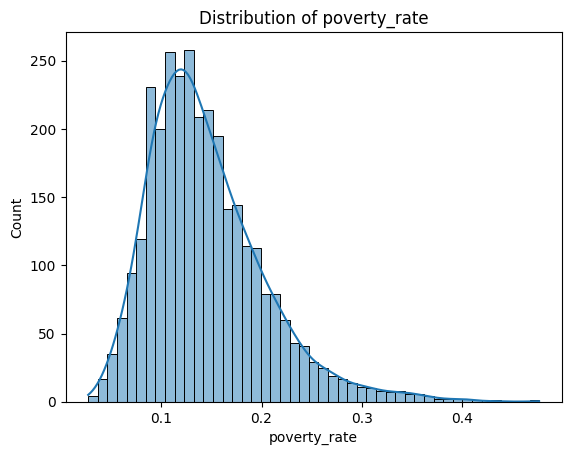

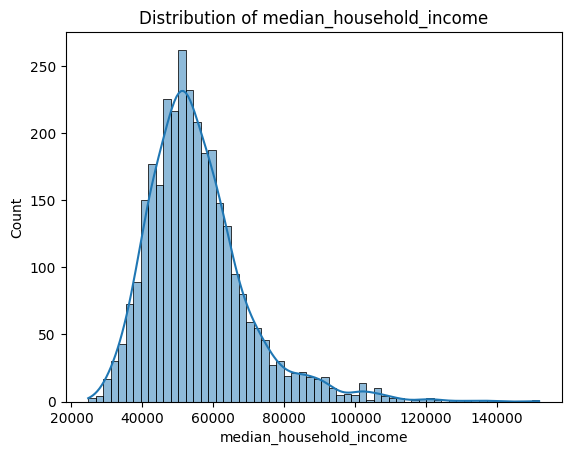

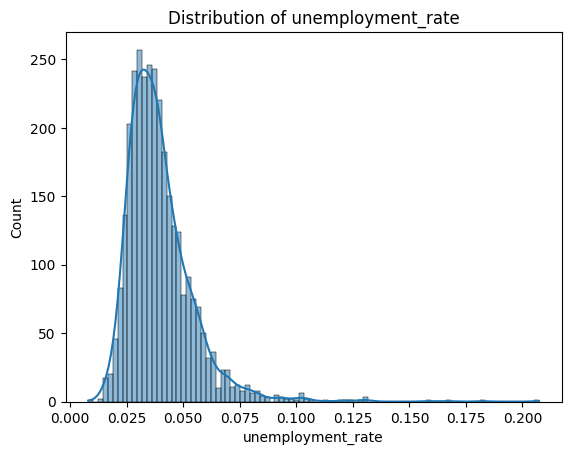

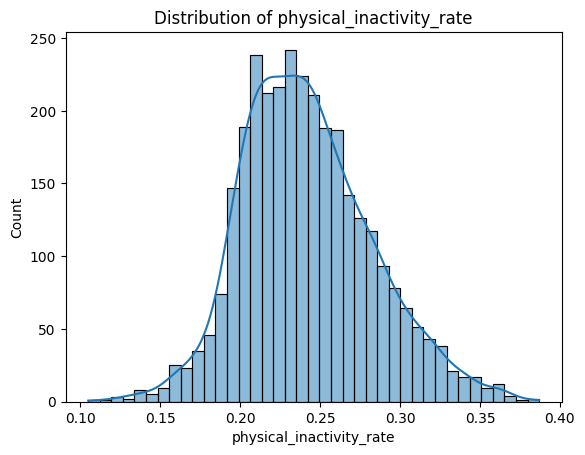

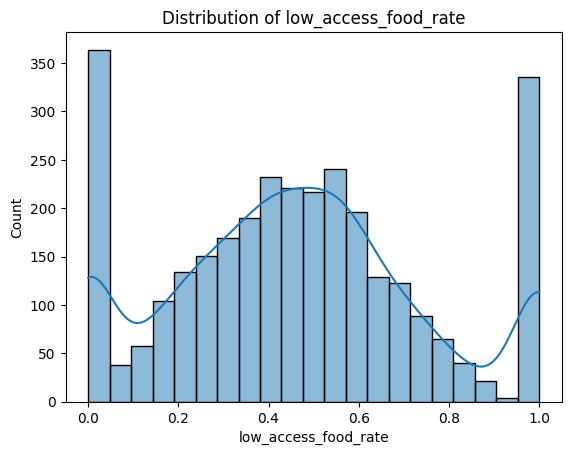

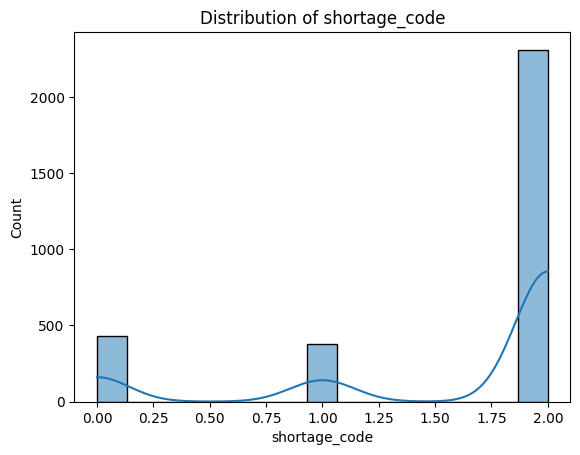

In [ ]:
for col in eda_features:
    sns.histplot(df_final[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()


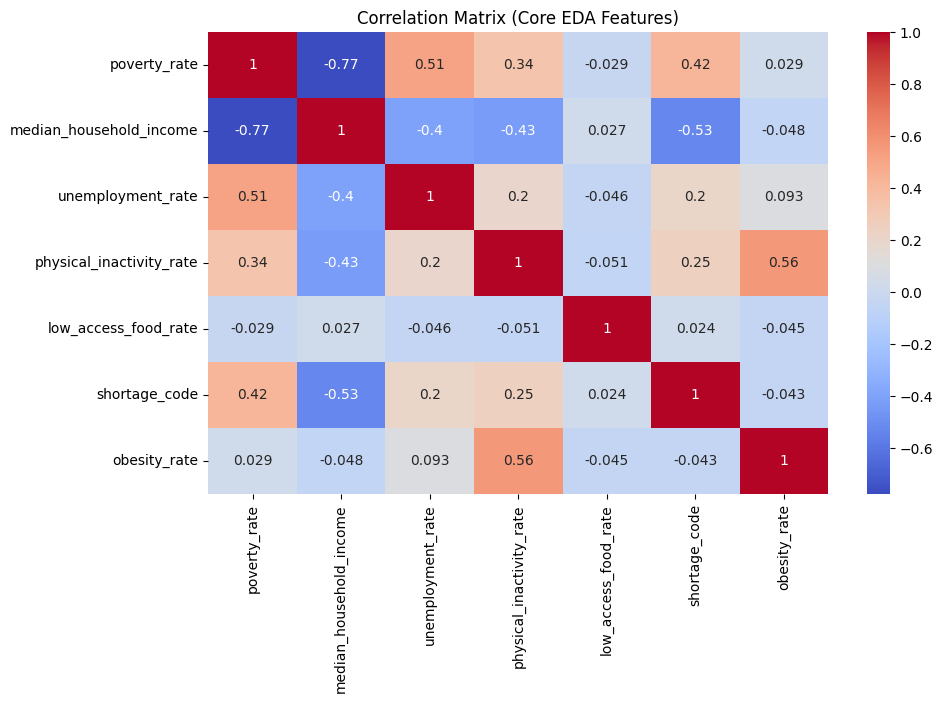

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df_final[eda_features + [target]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (Core EDA Features)")
plt.show()


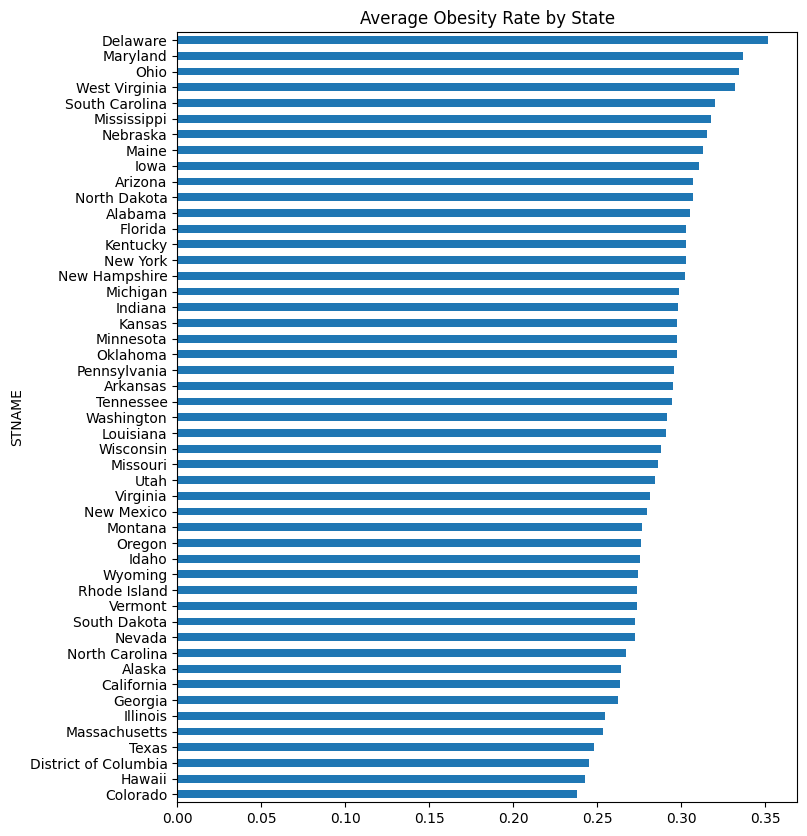

In [ ]:
state_avg = df_final.groupby("STNAME")["obesity_rate"].mean().sort_values()
state_avg.plot(kind='barh', figsize=(8,10))
plt.title("Average Obesity Rate by State")
plt.show()


# Finding relationship with features

Text(0.5, 1.0, 'Obesity vs Poverty Rate')

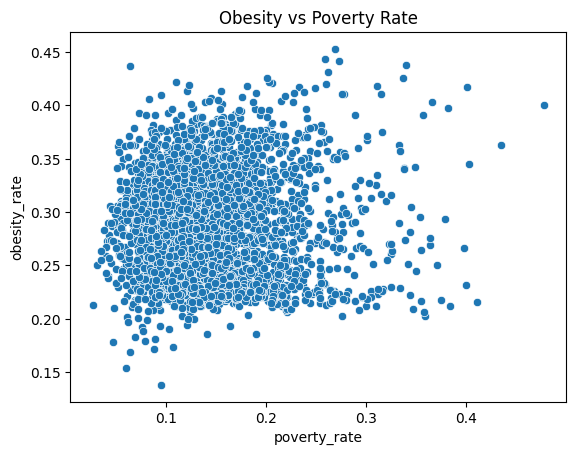

In [ ]:
sns.scatterplot(x=df_final["poverty_rate"], y=df_final["obesity_rate"])
plt.title("Obesity vs Poverty Rate")


Text(0.5, 1.0, 'Obesity vs Median Income')

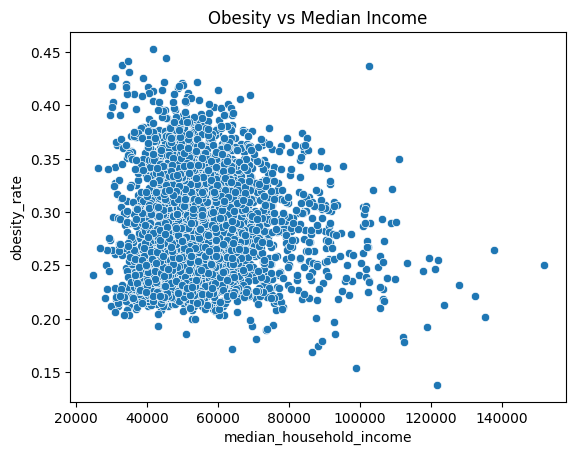

In [ ]:
sns.scatterplot(x=df_final["median_household_income"], y=df_final["obesity_rate"])
plt.title("Obesity vs Median Income")


Text(0.5, 1.0, 'Obesity vs Physical Inactivity')

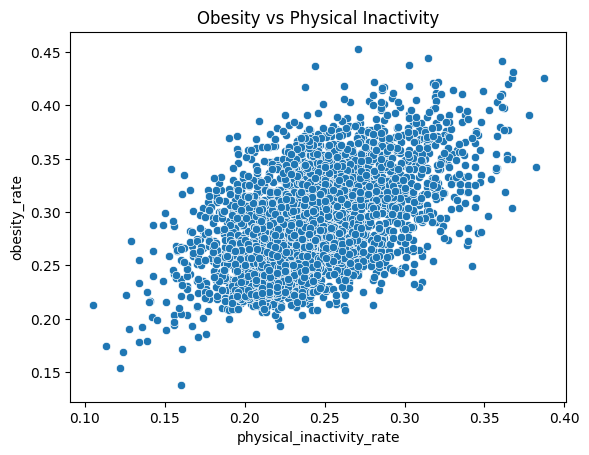

In [ ]:
sns.scatterplot(x=df_final["physical_inactivity_rate"], y=df_final["obesity_rate"])
plt.title("Obesity vs Physical Inactivity")


Text(0.5, 1.0, 'Obesity vs Food Access Difficulty')

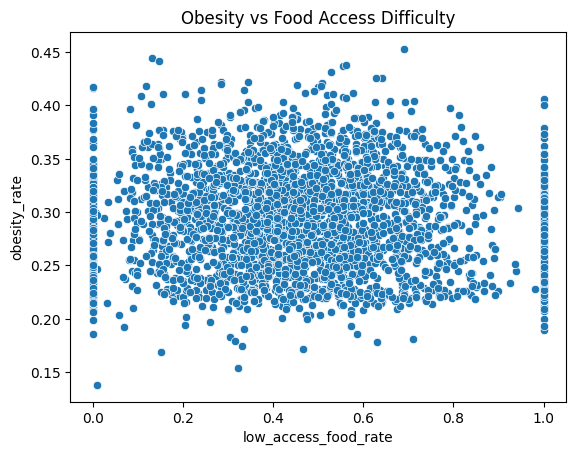

In [ ]:
sns.scatterplot(x=df_final["low_access_food_rate"], y=df_final["obesity_rate"])
plt.title("Obesity vs Food Access Difficulty")


Text(0.5, 1.0, 'Obesity vs Unemployment Rate')

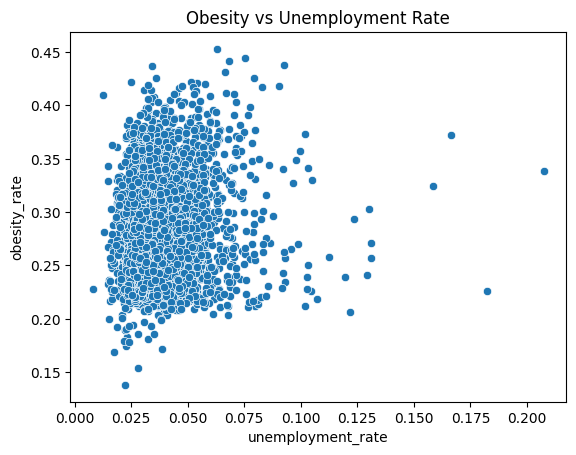

In [ ]:
sns.scatterplot(x=df_final["unemployment_rate"], y=df_final["obesity_rate"])
plt.title("Obesity vs Unemployment Rate")


Text(0.5, 1.0, 'Obesity vs Food Shortage Rate')

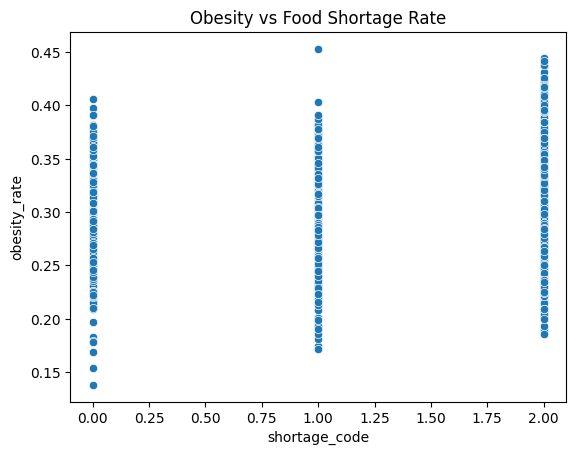

In [ ]:
sns.scatterplot(x=df_final["shortage_code"], y=df_final["obesity_rate"])
plt.title("Obesity vs Food Shortage Rate")


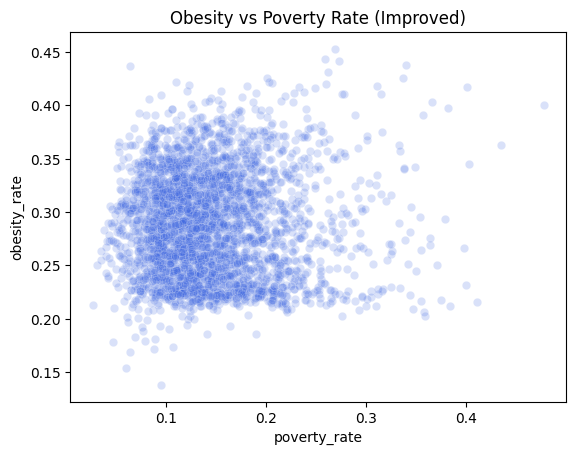

In [ ]:
sns.scatterplot(
    data=df_final,
    x="poverty_rate",
    y="obesity_rate",
    alpha=0.2,          # transparency
    color="royalblue"   # consistent color
)
plt.title("Obesity vs Poverty Rate (Improved)")
plt.show()


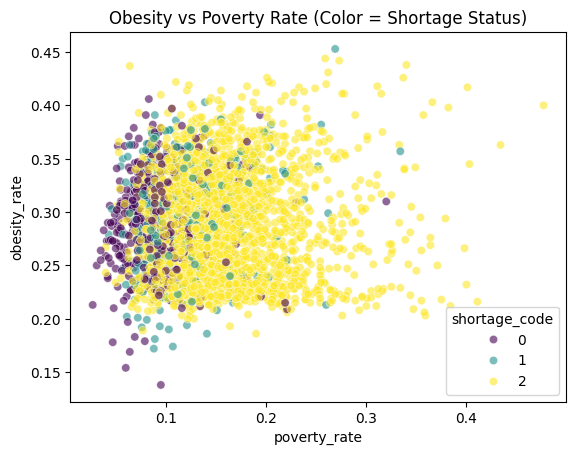

In [ ]:
sns.scatterplot(
    data=df_final,
    x="poverty_rate",
    y="obesity_rate",
    hue="shortage_code",     # color by healthcare access
    alpha=0.6,
    palette="viridis"
)
plt.title("Obesity vs Poverty Rate (Color = Shortage Status)")
plt.show()


In [ ]:
core_features = [
    "poverty_rate",
    "median_household_income",
    "physical_inactivity_rate",
    "low_access_food_rate",
    "unemployment_rate",
]


In [ ]:
import scipy.stats as stats

for col in core_features:
    r, p = stats.pearsonr(df_final[col], df_final["obesity_rate"])
    print(f"{col}: Pearson r = {r:.3f}, p = {p:.3e}")


poverty_rate: Pearson r = 0.029, p = 1.090e-01
median_household_income: Pearson r = -0.048, p = 7.510e-03
physical_inactivity_rate: Pearson r = 0.559, p = 2.966e-256
low_access_food_rate: Pearson r = -0.045, p = 1.278e-02
unemployment_rate: Pearson r = 0.093, p = 1.684e-07


In [ ]:
import numpy as np

for col in core_features:
    r, p = stats.pearsonr(np.log1p(df_final[col]), df_final["obesity_rate"])
    print(f"{col}: Log-Pearson r = {r:.3f}, p = {p:.3e}")


poverty_rate: Log-Pearson r = 0.029, p = 1.094e-01
median_household_income: Log-Pearson r = -0.026, p = 1.423e-01
physical_inactivity_rate: Log-Pearson r = 0.559, p = 9.844e-256
low_access_food_rate: Log-Pearson r = -0.013, p = 4.821e-01
unemployment_rate: Log-Pearson r = 0.095, p = 1.100e-07


In [ ]:
for col in core_features:
    r, p = stats.spearmanr(df_final[col], df_final["obesity_rate"])
    print(f"{col}: Spearman ρ = {r:.3f}, p = {p:.3e}")


poverty_rate: Spearman ρ = -0.005, p = 7.679e-01
median_household_income: Spearman ρ = 0.026, p = 1.395e-01
physical_inactivity_rate: Spearman ρ = 0.550, p = 9.264e-247
low_access_food_rate: Spearman ρ = -0.025, p = 1.586e-01
unemployment_rate: Spearman ρ = 0.097, p = 5.277e-08


In [ ]:
for col in core_features:
    r, p = stats.kendalltau(df_final[col], df_final["obesity_rate"])
    print(f"{col}: Kendall τ = {r:.3f}, p = {p:.3e}")


poverty_rate: Kendall τ = -0.003, p = 7.799e-01
median_household_income: Kendall τ = 0.017, p = 1.614e-01
physical_inactivity_rate: Kendall τ = 0.382, p = 1.399e-224
low_access_food_rate: Kendall τ = -0.016, p = 1.881e-01
unemployment_rate: Kendall τ = 0.066, p = 3.416e-08


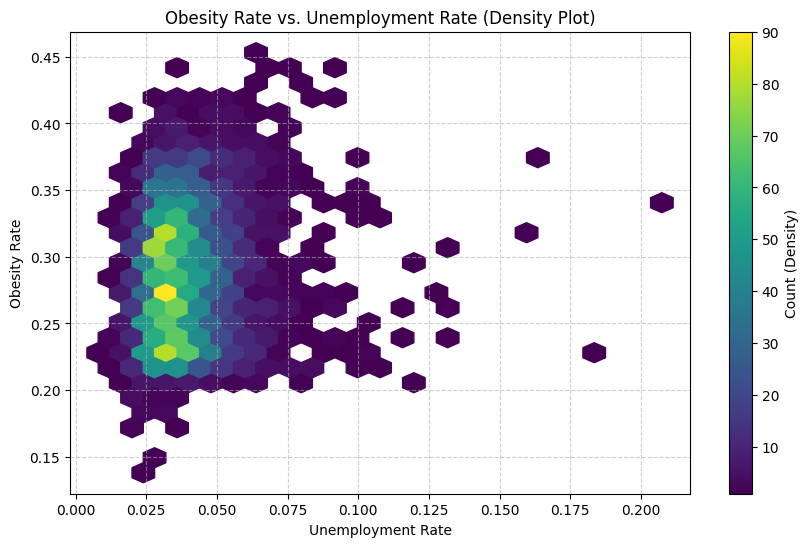

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (code to load and check data)

# Create the Hexagonal Binning Plot (Density Plot)
plt.figure(figsize=(10, 6))

# Use hexbin for density visualization
hb = plt.hexbin(
    x=df_final["unemployment_rate"],
    y=df_final["obesity_rate"],
    gridsize=25,
    cmap='viridis',  # A good default colormap for density
    mincnt=1
)

# Add a color bar to show the density scale
plt.colorbar(hb, label='Count (Density)')

plt.title("Obesity Rate vs. Unemployment Rate (Density Plot)")
plt.xlabel("Unemployment Rate")
plt.ylabel("Obesity Rate")
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('obesity_unemployment_density_plot.png')

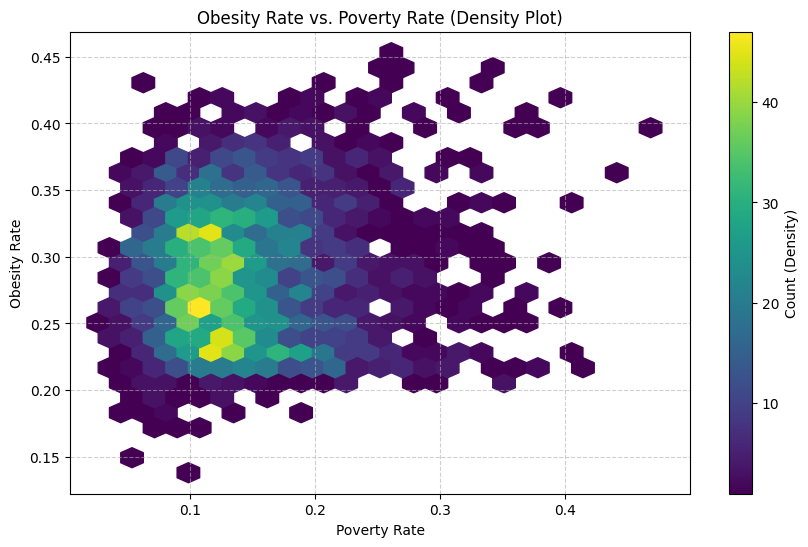

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (code to load and check data)

# Create the Hexagonal Binning Plot (Density Plot)
plt.figure(figsize=(10, 6))

# Use hexbin for density visualization
hb = plt.hexbin(
    x=df_final["poverty_rate"],
    y=df_final["obesity_rate"],
    gridsize=25,
    cmap='viridis',  # A good default colormap for density
    mincnt=1
)

# Add a color bar to show the density scale
plt.colorbar(hb, label='Count (Density)')

plt.title("Obesity Rate vs. Poverty Rate (Density Plot)")
plt.xlabel("Poverty Rate")
plt.ylabel("Obesity Rate")
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('obesity_unemployment_density_plot.png')

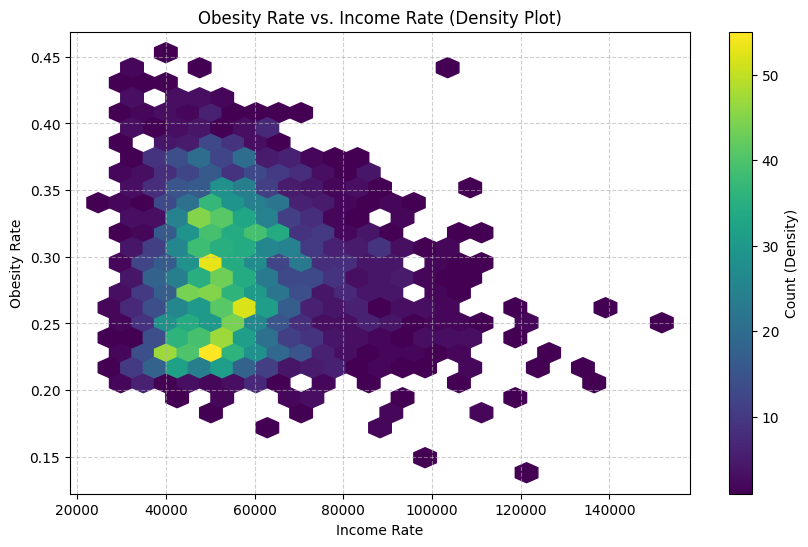

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ... (code to load and check data)

# Create the Hexagonal Binning Plot (Density Plot)
plt.figure(figsize=(10, 6))

# Use hexbin for density visualization
hb = plt.hexbin(
    x=df_final["median_household_income"],
    y=df_final["obesity_rate"],
    gridsize=25,
    cmap='viridis',  # A good default colormap for density
    mincnt=1
)

# Add a color bar to show the density scale
plt.colorbar(hb, label='Count (Density)')

plt.title("Obesity Rate vs. Income Rate (Density Plot)")
plt.xlabel("Income Rate")
plt.ylabel("Obesity Rate")
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('obesity_unemployment_density_plot.png')

# Analysis

In [ ]:
target = "obesity_rate"

core_features = [
    "poverty_rate",
    "median_household_income",
    "physical_inactivity_rate",
    "low_access_food_rate",
    "unemployment_rate",
]


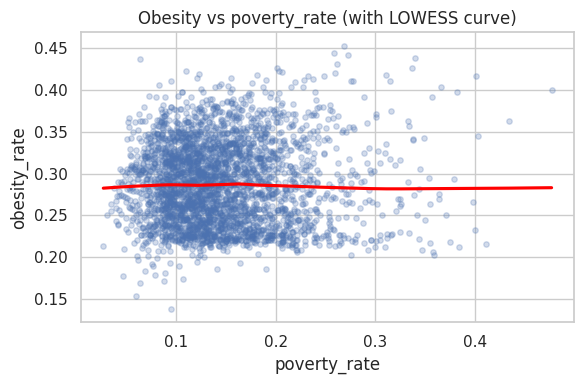

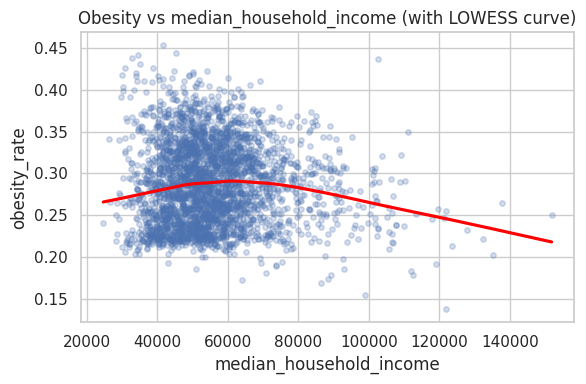

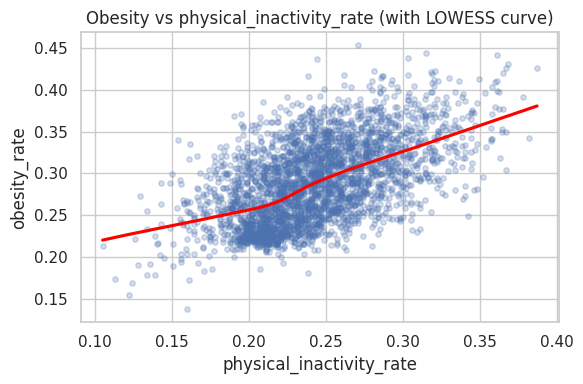

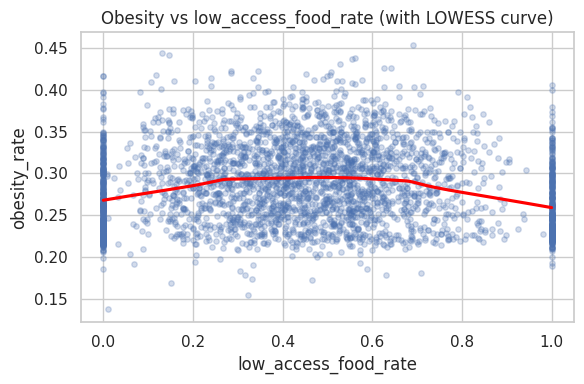

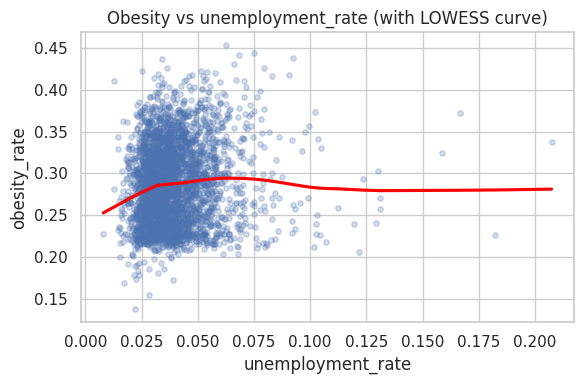

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

for col in core_features:
    plt.figure(figsize=(6,4))
    sns.regplot(
        data=df_final,
        x=col,
        y=target,
        lowess=True,          # <– LOWESS smoother
        scatter_kws={"alpha":0.25, "s":15},
        line_kws={"color":"red"}
    )
    plt.title(f"Obesity vs {col} (with LOWESS curve)")
    plt.tight_layout()
    plt.show()


Mutual Information with obesity_rate:
physical_inactivity_rate    0.233952
low_access_food_rate        0.057912
median_household_income     0.039743
poverty_rate                0.038245
unemployment_rate           0.009967
dtype: float64


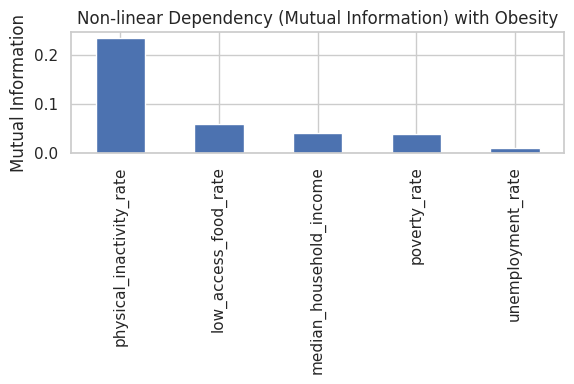

In [ ]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np
import pandas as pd

X = df_final[core_features].copy()
y = df_final[target].values

mi = mutual_info_regression(X, y, random_state=42)
mi_series = pd.Series(mi, index=core_features).sort_values(ascending=False)

print("Mutual Information with obesity_rate:")
print(mi_series)

plt.figure(figsize=(6,4))
mi_series.plot(kind="bar")
plt.ylabel("Mutual Information")
plt.title("Non-linear Dependency (Mutual Information) with Obesity")
plt.tight_layout()
plt.show()


In [ ]:
!pip install dcor


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.8 MB/s eta 0:00:00


In [ ]:
import dcor

for col in core_features:
    x = df_final[col].values
    y = df_final[target].values
    d = dcor.distance_correlation(x, y)
    print(f"{col}: distance correlation = {d:.3f}")


poverty_rate: distance correlation = 0.081
median_household_income: distance correlation = 0.089
physical_inactivity_rate: distance correlation = 0.523
low_access_food_rate: distance correlation = 0.162
unemployment_rate: distance correlation = 0.100


In [ ]:
!pip install pygam


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 kB 2.6 MB/s eta 0:00:00


In [ ]:
from pygam import LinearGAM, s
import numpy as np

X = df_final[core_features].values
y = df_final[target].values

gam = LinearGAM(
    s(0) + s(1) + s(2) + s(3) + s(4)   # one smooth term per feature
).fit(X, y)

print("GAM pseudo-R²:", gam.statistics_['pseudo_r2'])


GAM pseudo-R²: OrderedDict({'explained_deviance': np.float64(0.4446928603167437), 'McFadden': np.float64(0.5514460789027454), 'McFadden_adj': np.float64(0.4485232447955152)})


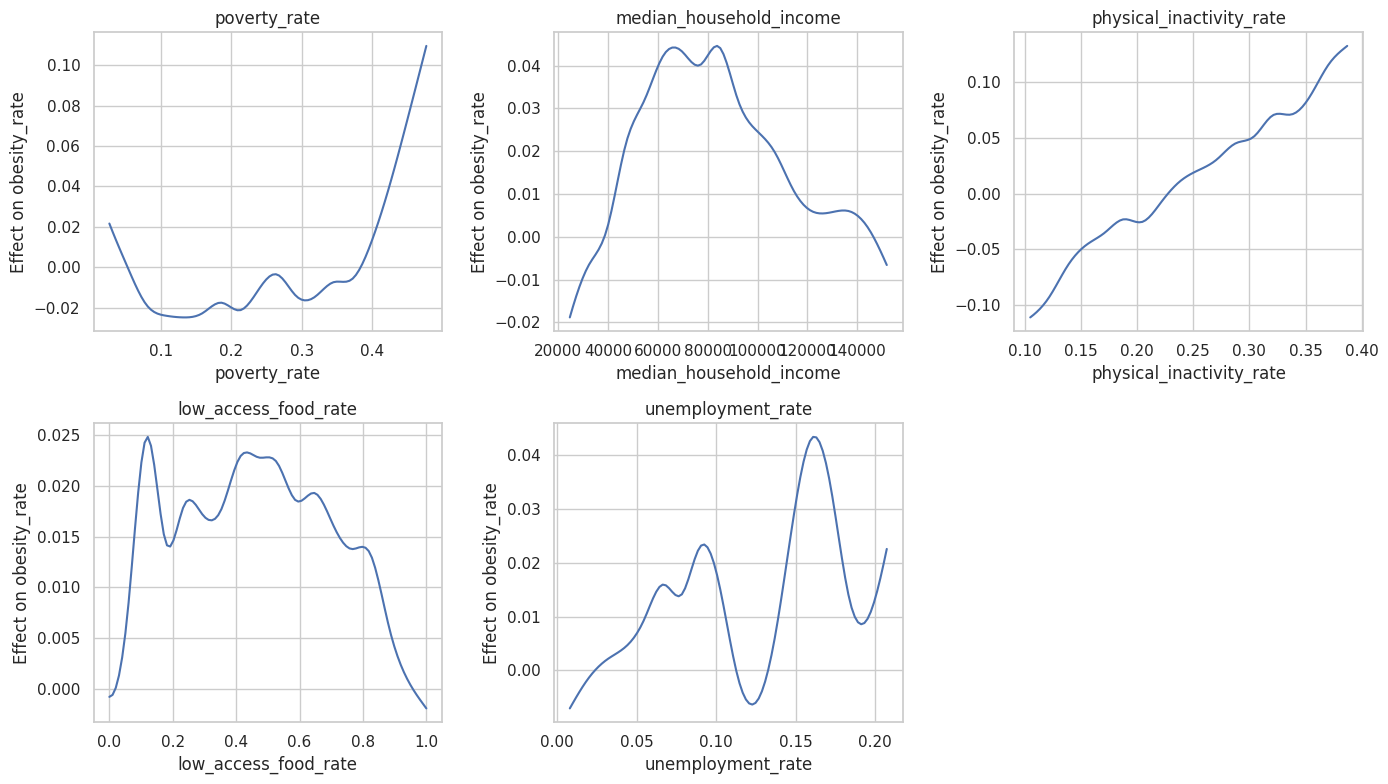

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(14,8))
axs = axs.ravel()

for i, col in enumerate(core_features):
    XX = gam.generate_X_grid(term=i)
    pdep = gam.partial_dependence(term=i, X=XX)
    axs[i].plot(XX[:, i], pdep)
    axs[i].set_title(col)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Effect on obesity_rate")

# hide empty subplot if 5 features
axs[-1].axis("off")

plt.tight_layout()
plt.show()


In [ ]:
import statsmodels.formula.api as smf

formula = """
obesity_rate ~ poverty_rate * low_access_food_rate
             + physical_inactivity_rate * median_household_income
             + unemployment_rate
"""

model_int = smf.ols(formula=formula, data=df_final).fit()
print(model_int.summary())


                            OLS Regression Results                            
Dep. Variable:           obesity_rate   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     257.4
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          4.36e-303
Time:                        18:30:06   Log-Likelihood:                 5730.4
No. Observations:                3121   AIC:                        -1.144e+04
Df Residuals:                    3113   BIC:                        -1.140e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

In [ ]:
# Make a grid of values
pov_grid = np.linspace(df_final["poverty_rate"].min(), df_final["poverty_rate"].max(), 30)
food_grid = np.linspace(df_final["low_access_food_rate"].min(), df_final["low_access_food_rate"].max(), 30)

grid = pd.DataFrame(
    [(p, f) for p in pov_grid for f in food_grid],
    columns=["poverty_rate","low_access_food_rate"]
)

# Hold other vars at their mean
grid["physical_inactivity_rate"] = df_final["physical_inactivity_rate"].mean()
grid["median_household_income"] = df_final["median_household_income"].mean()
grid["unemployment_rate"] = df_final["unemployment_rate"].mean()

grid["obesity_pred"] = model_int.predict(grid)

# Pivot for heatmap
pivot = grid.pivot(index="poverty_rate", columns="low_access_food_rate", values="obesity_pred")

plt.figure(figsize=(6,5))
sns.heatmap(pivot, cmap="viridis")
plt.xlabel("Low access food rate")
plt.ylabel("Poverty rate")
plt.title("Predicted obesity (with interaction)")
plt.tight_layout()
plt.show()


                            OLS Regression Results                            
Dep. Variable:           obesity_rate   R-squared:                       0.367
Model:                            OLS   Adj. R-squared:                  0.365
Method:                 Least Squares   F-statistic:                     257.4
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          4.36e-303
Time:                        18:30:07   Log-Likelihood:                 5730.4
No. Observations:                3121   AIC:                        -1.144e+04
Df Residuals:                    3113   BIC:                        -1.140e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------

# Demographic Analysis


In [ ]:
race_vars = {
    "pct_white":      (df_final["WA_MALE"] + df_final["WA_FEMALE"]) / df_final["TOT_POP"],
    "pct_black":      (df_final["BA_MALE"] + df_final["BA_FEMALE"]) / df_final["TOT_POP"],
    "pct_native":     (df_final["IA_MALE"] + df_final["IA_FEMALE"]) / df_final["TOT_POP"],
    "pct_asian":      (df_final["AA_MALE"] + df_final["AA_FEMALE"]) / df_final["TOT_POP"],
    "pct_pacific":    (df_final["NA_MALE"] + df_final["NA_FEMALE"]) / df_final["TOT_POP"],
    "pct_two_plus":   (df_final["TOM_MALE"] + df_final["TOM_FEMALE"]) / df_final["TOT_POP"],
    "pct_hispanic":   (df_final["H_MALE"] + df_final["H_FEMALE"]) / df_final["TOT_POP"],
    "pct_non_hispanic": (df_final["NH_MALE"] + df_final["NH_FEMALE"]) / df_final["TOT_POP"]
}

for col, val in race_vars.items():
    df_final[col] = val


In [ ]:
from scipy.stats import pearsonr
race_cols = [
    "pct_white", "pct_black", "pct_hispanic",
    "pct_asian", "pct_native", "pct_pacific", "pct_two_plus"
]

for col in race_cols:
    r, p = pearsonr(df_final[col], df_final["obesity_rate"])
    print(f"{col}: Pearson r = {r:.3f}, p = {p:.4g}")

pct_white: Pearson r = -0.061, p = 0.0006705
pct_black: Pearson r = 0.054, p = 0.002775
pct_hispanic: Pearson r = -0.155, p = 2.599e-18
pct_asian: Pearson r = -0.055, p = 0.001936
pct_native: Pearson r = 0.058, p = 0.00119
pct_pacific: Pearson r = -0.032, p = 0.07807
pct_two_plus: Pearson r = -0.021, p = 0.2496


In [ ]:
from sklearn.feature_selection import mutual_info_regression
from dcor import distance_correlation

X = df_final[race_cols].fillna(0)

mi = mutual_info_regression(X, df_final["obesity_rate"])
for col, val in zip(race_cols, mi):
    print(f"{col}: MI = {val:.4f}")

for col in race_cols:
    print(col, distance_correlation(df_final[col], df_final["obesity_rate"]))


pct_white: MI = 0.0188
pct_black: MI = 0.0146
pct_hispanic: MI = 0.0276
pct_asian: MI = 0.0122
pct_native: MI = 0.0168
pct_pacific: MI = 0.0024
pct_two_plus: MI = 0.0381
pct_white 0.07025573703199527
pct_black 0.06600759606333836
pct_hispanic 0.18044992893935224
pct_asian 0.07946719157689303
pct_native 0.09684674635772303
pct_pacific 0.04504168409675835
pct_two_plus 0.03529127336516064


In [ ]:
df_final["dominant_group"] = df_final[race_cols].idxmax(axis=1)


In [ ]:
group_stats = (
    df_final.groupby("dominant_group")[["obesity_rate", "poverty_rate", "median_household_income"]]
    .mean()
    .sort_values("obesity_rate", ascending=False)
)

group_stats


obesity_rate  poverty_rate  median_household_income
dominant_group                                                     
pct_native          0.333008      0.281635             42991.580645
pct_hispanic        0.299000      0.262000             41470.000000
pct_black           0.295889      0.252888             40101.289474
pct_white           0.286969      0.139365             56217.830360
pct_asian           0.265007      0.101007             79531.666667
pct_pacific         0.211765      0.134014             53241.500000

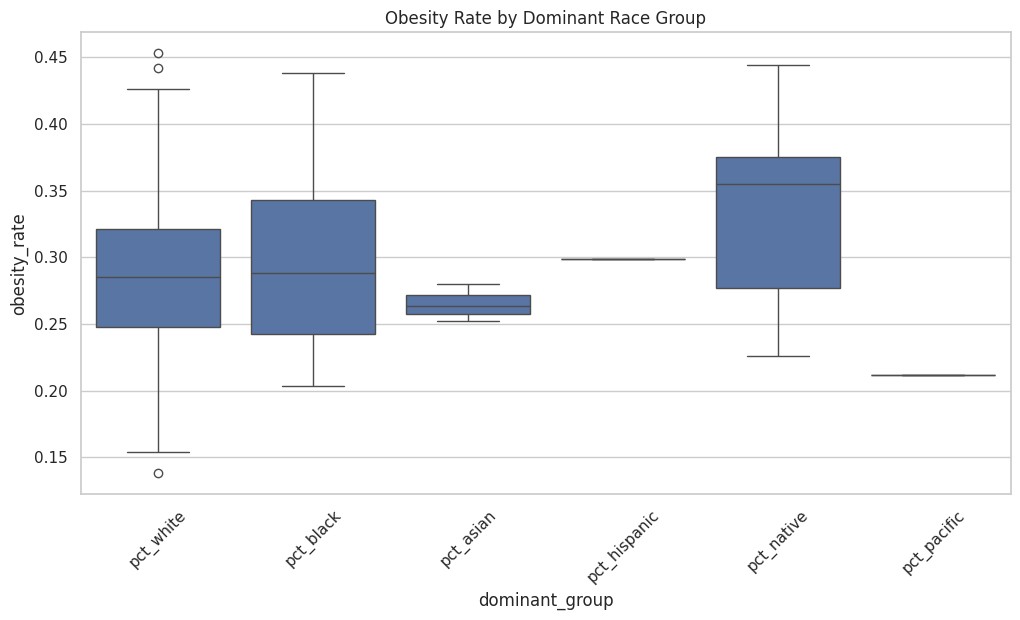

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x="dominant_group", y="obesity_rate", data=df_final)
plt.xticks(rotation=45)
plt.title("Obesity Rate by Dominant Race Group")
plt.show()


<Axes: xlabel='pct_black', ylabel='obesity_rate'>

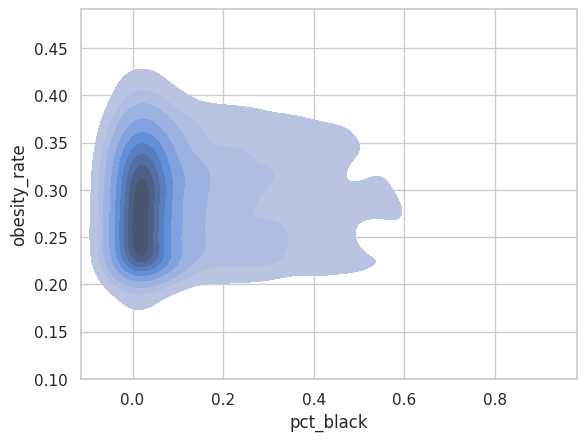

In [ ]:
sns.kdeplot(
    x=df_final["pct_black"],
    y=df_final["obesity_rate"],
    fill=True
)


In [ ]:
import statsmodels.formula.api as smf

formula = """
obesity_rate ~ physical_inactivity_rate + poverty_rate + median_household_income +
pct_black + pct_hispanic + pct_asian + pct_native + pct_two_plus
"""

model = smf.ols(formula=formula, data=df_final).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:           obesity_rate   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     222.0
Date:                Sun, 16 Nov 2025   Prob (F-statistic):          2.34e-298
Time:                        18:49:08   Log-Likelihood:                 5722.3
No. Observations:                3121   AIC:                        -1.143e+04
Df Residuals:                    3112   BIC:                        -1.137e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

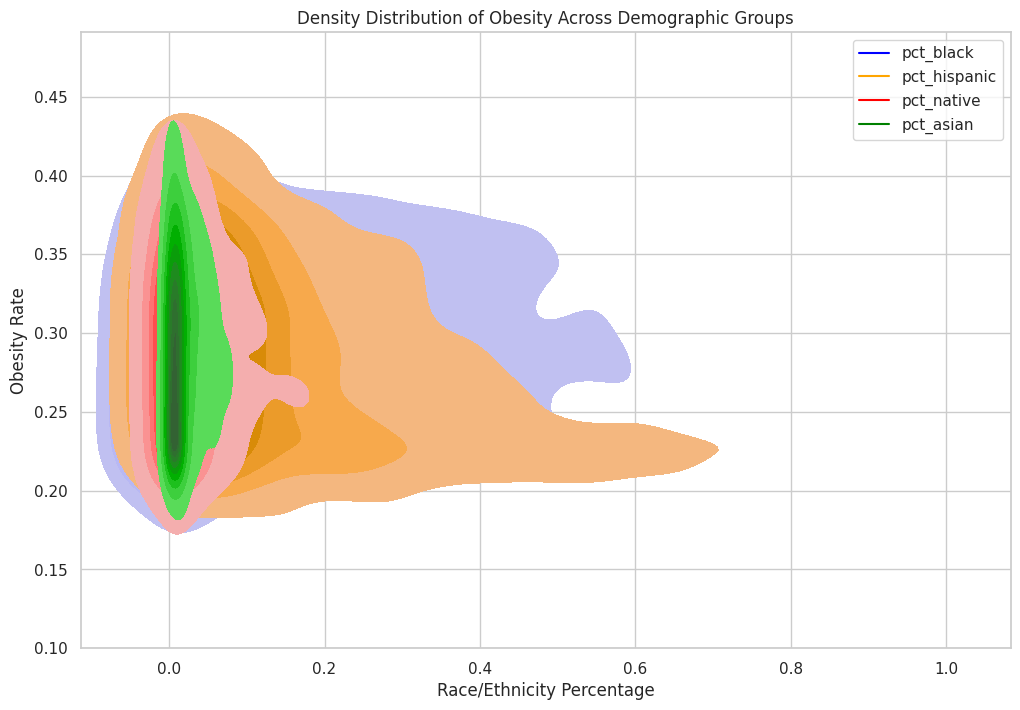

In [ ]:
plt.figure(figsize=(12,8))
ax = plt.gca() # Get the current axes object

handles = []
labels = []

for race, color in zip([
    "pct_black",
    "pct_hispanic",
    "pct_native",
    "pct_asian"
], ["blue","orange","red","green"]):
    sns.kdeplot(
        x=df_final[race],
        y=df_final["obesity_rate"],
        fill=True,
        thresh=0.05,
        color=color,
        ax=ax
    )
    # Add a dummy plot for the legend to pick up and collect its handle and label
    line, = ax.plot([], [], color=color, label=race) # The comma unpacks the list returned by plot
    handles.append(line)
    labels.append(race)

plt.title("Density Distribution of Obesity Across Demographic Groups")
plt.xlabel("Race/Ethnicity Percentage")
plt.ylabel("Obesity Rate")
ax.legend(handles=handles, labels=labels) # Pass handles and labels explicitly
plt.show()

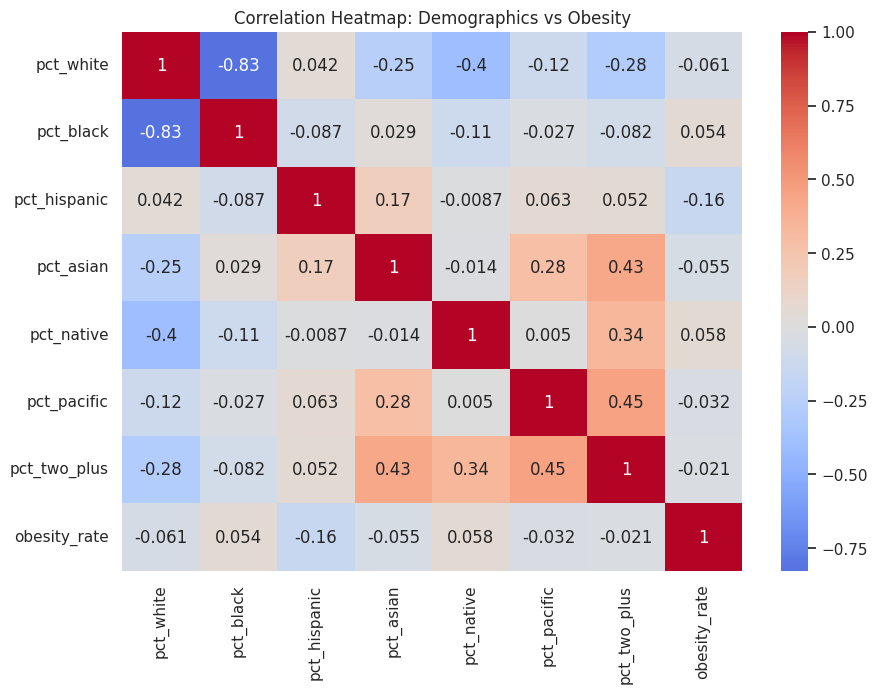

In [ ]:
demo_cols = [
    "pct_white", "pct_black", "pct_hispanic",
    "pct_asian", "pct_native", "pct_pacific", "pct_two_plus"
]

corr = df_final[demo_cols + ["obesity_rate"]].corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap: Demographics vs Obesity")
plt.show()


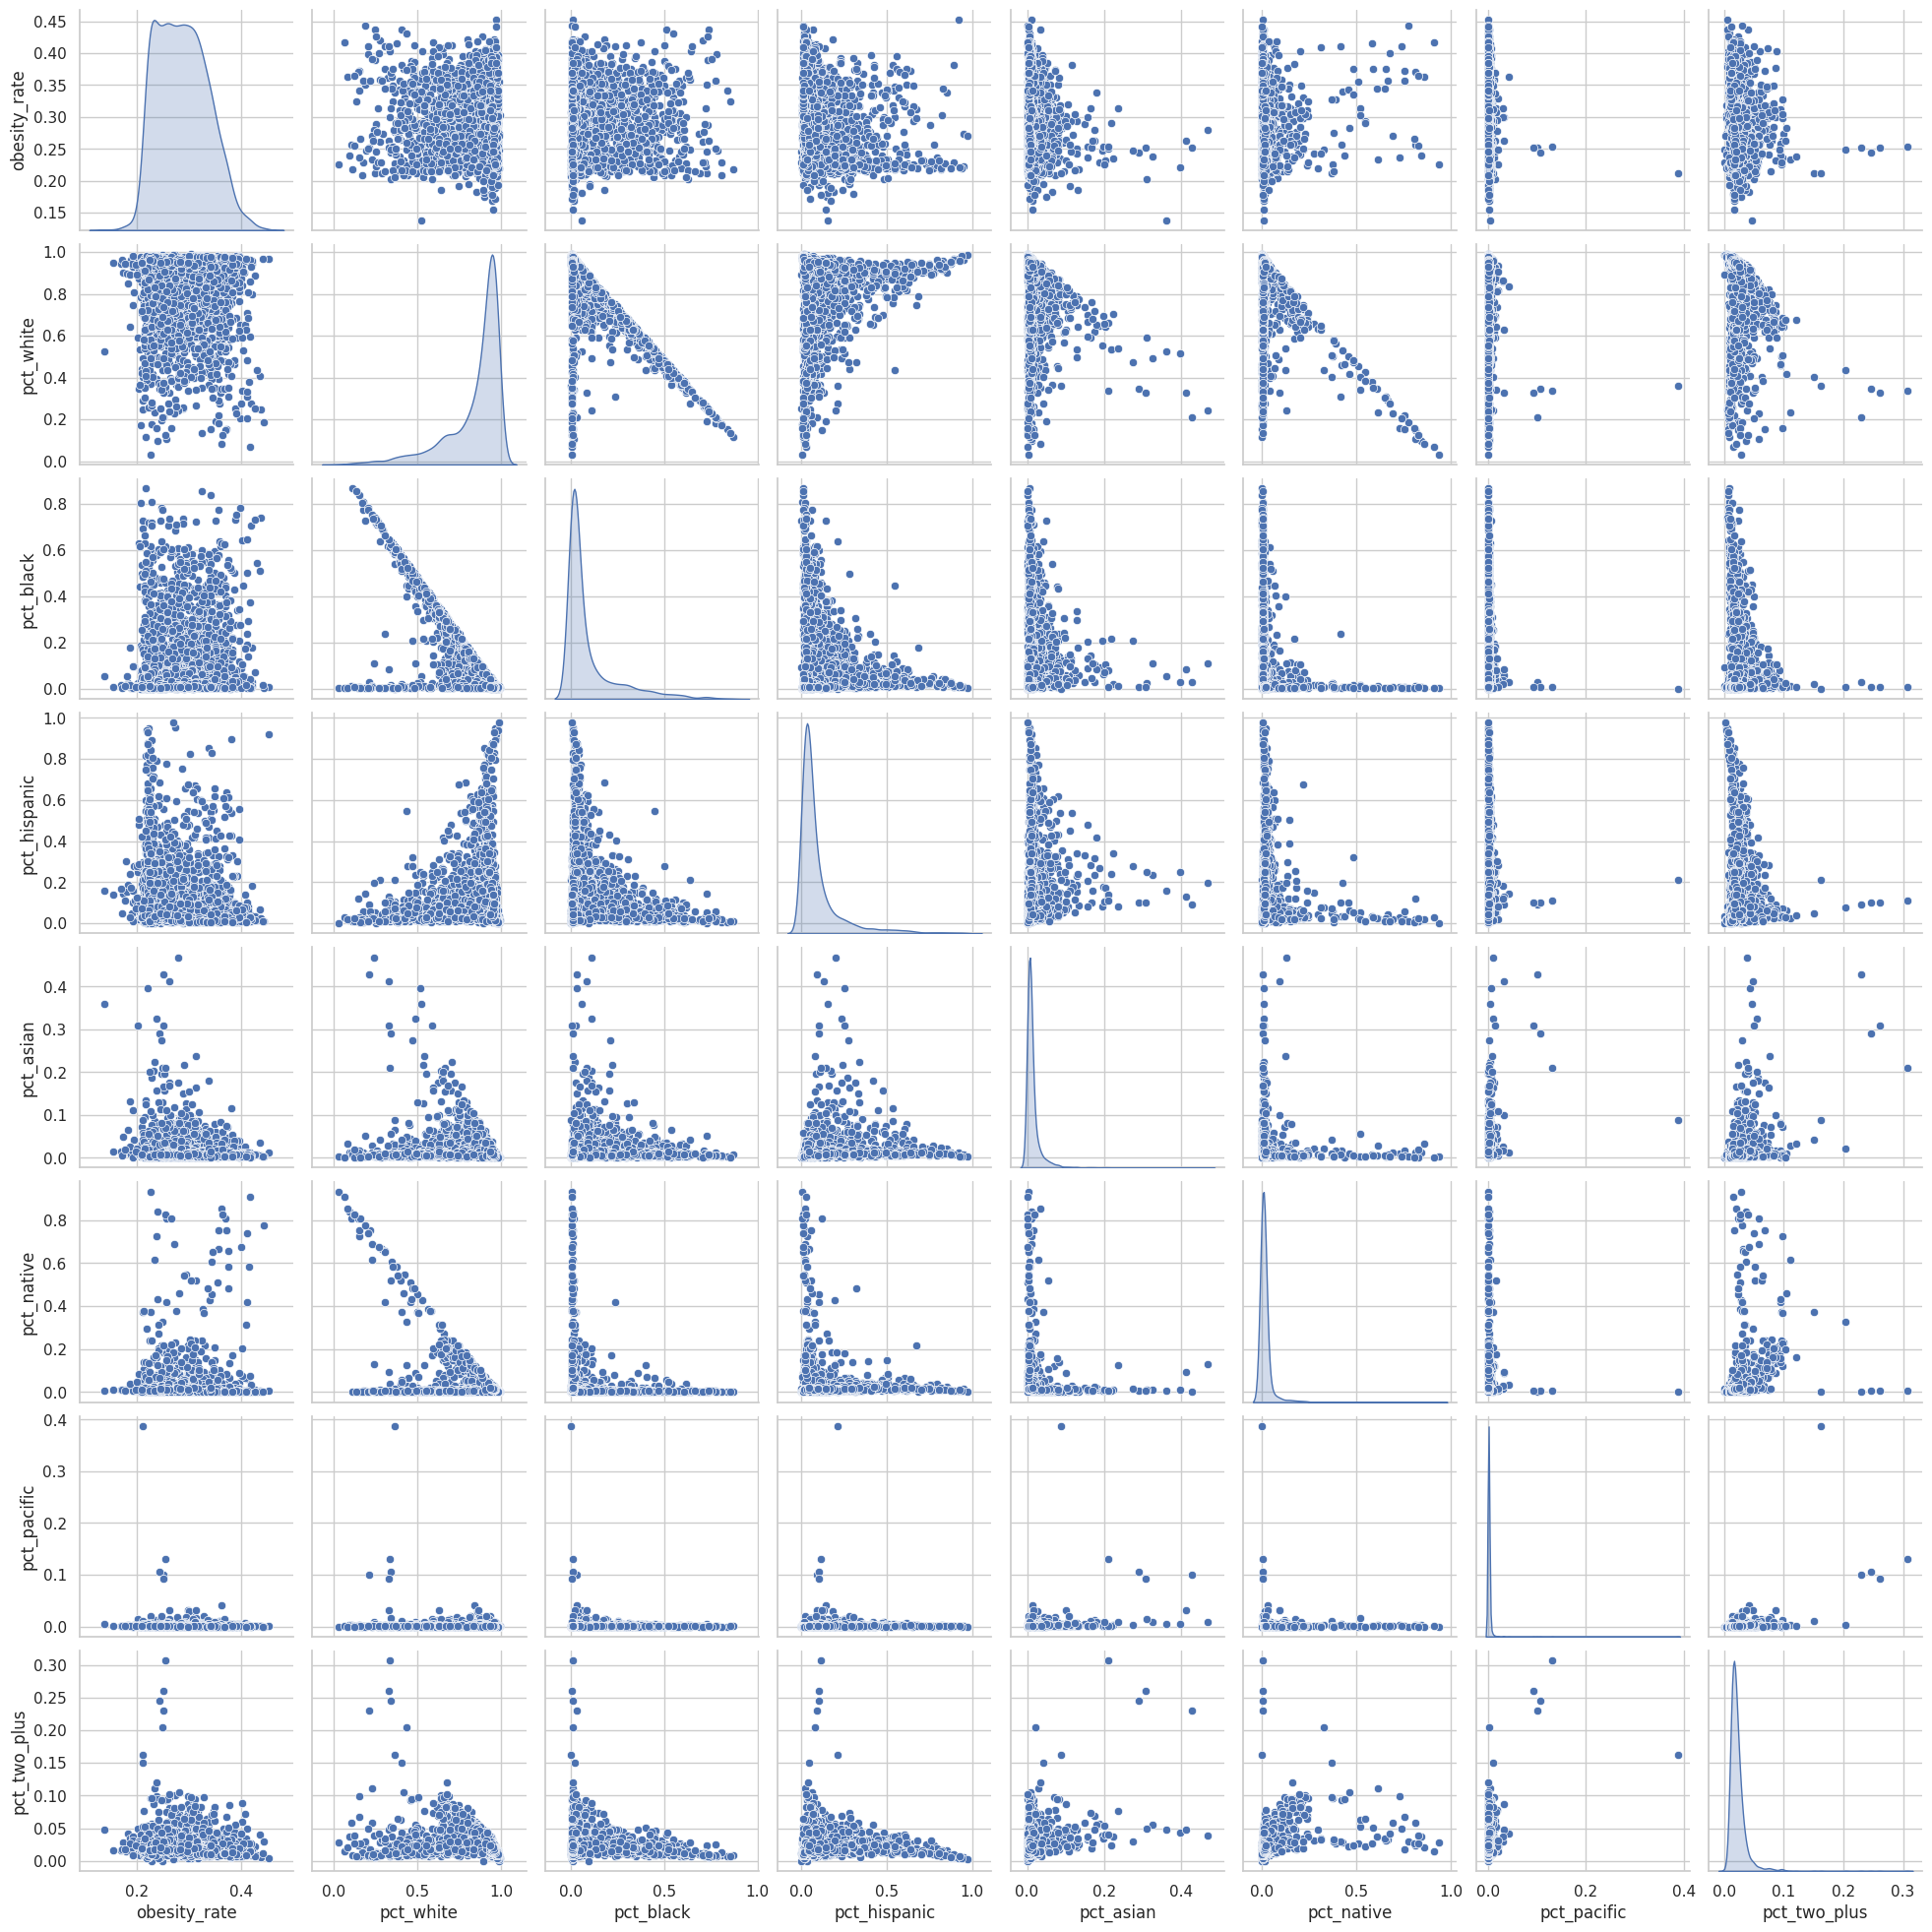

In [ ]:
sns.pairplot(df_final[["obesity_rate"] + demo_cols], diag_kind="kde")
plt.show()


In [ ]:
df_final.describe()

obesity_rate  poverty_rate  physical_inactivity_rate  \
count   3121.000000   3121.000000               3121.000000   
mean       0.287710      0.144926                  0.241949   
std        0.048485      0.057955                  0.040564   
min        0.138000      0.027000                  0.105000   
25%        0.248002      0.104017                  0.213001   
50%        0.285016      0.134014                  0.238011   
75%        0.323002      0.175003                  0.267004   
max        0.453001      0.477058                  0.387003   

       low_access_food_rate  median_household_income  unemployment_rate  \
count           3121.000000              3121.000000        3121.000000   
mean               0.461953             55514.503845           0.039577   
std                0.286982             14256.262742           0.014787   
min                0.000000             24732.000000           0.008000   
25%                0.265225             46182.000000           0.029874   
50%                0.452504             53241.500000           0.036828   
75%                0.626227             61791.000000           0.045716   
max                1.000000            151806.000000           0.207356   

       shortage_code  SUMLEV        STATE       COUNTY  ...   state_code  \
count    3121.000000  3112.0  3112.000000  3112.000000  ...  3121.000000   
mean        1.601089    50.0    30.318766   104.325193  ...    30.255046   
std         0.719320     0.0    15.167275   107.856094  ...    15.192135   
min         0.000000    50.0     1.000000     1.000000  ...     1.000000   
25%         1.000000    50.0    18.000000    35.000000  ...    18.000000   
50%         2.000000    50.0    29.000000    79.000000  ...    29.000000   
75%         2.000000    50.0    46.000000   135.000000  ...    45.000000   
max         2.000000    50.0    56.000000   840.000000  ...    56.000000   

       county_code    pct_white    pct_black   pct_native    pct_asian  \
count  3121.000000  3121.000000  3121.000000  3121.000000  3121.000000   
mean    104.128484     0.842395     0.093894     0.024076     0.015632   
std     107.847366     0.164180     0.145216     0.077524     0.029281   
min       1.000000     0.031668     0.000000     0.000000     0.000000   
25%      35.000000     0.796039     0.009092     0.004125     0.004919   
50%      79.000000     0.910753     0.025736     0.006946     0.007605   
75%     135.000000     0.952906     0.107288     0.014170     0.014462   
max     840.000000     0.991175     0.866951     0.933198     0.468421   

       pct_pacific  pct_two_plus  pct_hispanic  pct_non_hispanic  
count  3121.000000   3121.000000   3121.000000       3121.000000  
mean      0.001490      0.022262      0.097401          0.902472  
std       0.008212      0.015986      0.136836          0.136809  
min       0.000000      0.000000      0.000000          0.024180  
25%       0.000345      0.014344      0.024185          0.896721  
50%       0.000670      0.018741      0.045805          0.953899  
75%       0.001290      0.025415      0.103279          0.975815  
max       0.387500      0.306765      0.975820          1.000000  

[8 rows x 96 columns]

In [ ]:
df_final.to_csv("/content/drive/MyDrive/obesity-risk-analytics/data/processed/df_final_demographic.csv", index=False)

features = physical inactivity, unemployment, median_income, poverty_rate, pct_hispanic, pct_native, pct_black